In [1]:
import numpy as np
import matplotlib.pyplot as plt

import functions

from scipy.optimize import linprog

In [2]:
plt.style.use('ggplot')

In [3]:
# Ejercicio 3

In [4]:
def givens(x1: float, x2: float) -> tuple[float, float]:
    '''
    Calcula los parámetros de una rotación de Givens.
    '''

    c = 1
    s = 0

    ax1 = abs(x1)
    ax2 = abs(x2)

    if ax1 + ax2 != 0:

        if ax2 > ax1:
            tau = - x1 / x2
            s = - np.sign(x2) / np.sqrt(1 + tau**2)
            c = s * tau
        else:
            tau = - x2 / x1
            c = np.sign(x1) / np.sqrt(1 + tau**2)
            s = c * tau

    return c, s


def householder(x: np.ndarray) -> tuple[np.ndarray, float]:
    '''
    Calcula los parámetros de una reflexión de Householder.
    '''

    n = len(x)

    rho = 0
    u = x.copy()
    u[0] = 1

    if n == 1:
        sigma = 0
    else:
        sigma = sum(x[1:]**2)

    if (sigma != 0) or (x[0] < 0):

        mu = np.sqrt(x[0]**2 + sigma)

        if x[0] <= 0:
            gamma = x[0] - mu
        else:
            gamma = - sigma / (x[0] + mu)

        rho = 2 * gamma**2 / (gamma**2 + sigma)
        u = u / gamma
        u[0] = 1

    return u, rho

In [5]:
# givens
x1 = 1
x2 = 1
x = np.array([x1, x2])

c, s = givens(x1, x2)
G = np.array([[c, -s], [s, c]])

print(f'G @ x = {G @ x}')

G @ x = [1.41421356 0.        ]


In [6]:
# householder
n = 3
x = np.random.random(n)
print(f'x = {x}\n')

u, rho = householder(x)
Q = np.eye(n) - rho * np.outer(u, u.T)

y = Q @ x
print(f'y = {y}\n')

isclose = np.isclose(np.linalg.norm(x, ord=2), y[0])
print(f'norm(x, 2) == y[0]: {isclose}')

x = [0.60067766 0.47371533 0.26442926]

y = [8.09408851e-01 1.25498604e-16 6.59191586e-17]

norm(x, 2) == y[0]: True


In [7]:
def qrgivens(A: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    '''
    Realiza la descomposición QR de la matriz A utilizando 
    el método de rotaciones de Givens (sin pivoteo).
    '''

    m, n = A.shape

    Q = np.eye(m)
    R = A.copy()
    p = min(m-1, n)

    for j in range(p):
        for i in range(j+1, m):

            if R[i, j] != 0:

                c, s = givens(R[j, j], R[i, j])
                G = np.array([[c, -s], [s, c]])

                R[[j, i], j:] = G @ R[[j, i], j:]
                Q[:, [j, i]] = Q[:, [j, i]] @ G.T

    if (m <= n) and (R[m-1, m-1] < 0):

        R[m-1, m-1:] = - R[m-1, m-1:]
        Q[:, m-1] = - Q[:, m-1]

    return Q, R


def qrhouseholder(A: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    '''
    Realiza la descomposición QR de la matriz A utilizando 
    el método de transformaciones de Householder (sin pivoteo).
    '''

    m, n = A.shape

    Q = np.eye(m)
    R = A.copy()
    p = min(m, n)

    for j in range(p):

        u, rho = householder(R[j:, j])
        w = rho * u
        R[j:, j:] = R[j:, j:] - np.outer(w, u.T @ R[j:, j:])
        Q[:, j:] = Q[:, j:] - Q[:, j:] @ np.outer(w, u.T)

    return Q, R

In [8]:
# test
m = 3
n = 4
A = np.random.random((m, n))

print('A =')
print(A)

A =
[[0.31713342 0.15758919 0.47507622 0.71193663]
 [0.44637345 0.48063933 0.79558325 0.00749452]
 [0.96709122 0.84593322 0.04085844 0.7403825 ]]


In [9]:
# qrgivens
Q_givens, R_givens = qrgivens(A)

print('Q_givens =')
print(Q_givens)

print('\nR_givens =')
print(R_givens)

QR_givens = Q_givens @ R_givens
print('\nnorm(A - Q_givens @ R_givens, fro) =', np.linalg.norm(A - QR_givens, ord='fro'))

Q_givens =
[[ 0.28535994 -0.80289409  0.52338397]
 [ 0.40165146  0.5960048   0.69530884]
 [ 0.87019872 -0.01180465 -0.49255948]]

R_givens =
[[ 1.11134526e+00  9.74149137e-01  4.90669859e-01  8.50448282e-01]
 [-4.33835176e-18  1.49949978e-01  9.22532316e-02 -5.75882895e-01]
 [-6.10913979e-17 -3.25517377e-19  7.81698132e-01  1.31448038e-02]]

norm(A - Q_givens @ R_givens, fro) = 3.435672288390888e-16


In [10]:
# householder
Q_householder, R_householder = qrhouseholder(A)

print('Q_householder =')
print(Q_householder)

print('\nR_householder =')
print(R_householder)

QR_householder = Q_householder @ R_householder
print('\nnorm(A - Q_householder @ R_householder, fro) =', np.linalg.norm(A - QR_householder, ord='fro'))

Q_householder =
[[ 0.28535994 -0.80289409  0.52338397]
 [ 0.40165146  0.5960048   0.69530884]
 [ 0.87019872 -0.01180465 -0.49255948]]

R_householder =
[[ 1.11134526e+00  9.74149137e-01  4.90669859e-01  8.50448282e-01]
 [ 5.55111512e-17  1.49949978e-01  9.22532316e-02 -5.75882895e-01]
 [ 0.00000000e+00 -2.77555756e-17  7.81698132e-01  1.31448038e-02]]

norm(A - Q_householder @ R_householder, fro) = 3.8068485930024564e-16


In [11]:
# Ejercicio 4

In [12]:
def qrgivensp(A: np.ndarray) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    '''
    Realiza la descomposición QR de la matriz A utilizando 
    el método de rotaciones de Givens con pivoteo de columnas.
    '''
    
    m, n = A.shape

    Q = np.eye(m)
    R = A.copy()
    P = np.eye(n)
    c = np.sum(R**2, axis=0)

    for j in range(min(m - 1, n)):

        l = j + np.argmax(c[j:])

        if c[l] == 0:
            break

        R[:, [j, l]] = R[:, [l, j]]
        P[:, [j, l]] = P[:, [l, j]]
        c[[j, l]] = c[[l, j]]

        for i in range(j+1, m):

            if R[i, j] != 0:

                cos, sin = givens(R[j, j], R[i, j])
                G = np.array([[cos, -sin], [sin, cos]])

                R[[j, i], j:] = G @ R[[j, i], j:]
                Q[:, [j, i]] = Q[:, [j, i]] @ G.T

        c[j:] = c[j:] - R[j, j:]**2

    if (m <= n) and (R[m-1, m-1] < 0):

        R[m-1, m-1:] = -R[m-1, m-1:]
        Q[:, m-1] = -Q[:, m-1]

    return Q, R, P


def qrhouseholderp(A: np.ndarray) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    '''
    Realiza la descomposición QR de la matriz A utilizando 
    el método de reflexiones de Householder con pivoteo de columnas.
    '''
    
    m, n = A.shape

    Q = np.eye(m)
    R = A.copy()
    P = np.eye(n)
    c = np.sum(R**2, axis=0)

    for j in range(min(m, n)):

        l = j + np.argmax(c[j:])

        if c[l] == 0:
            break

        R[:, [j, l]] = R[:, [l, j]]
        P[:, [j, l]] = P[:, [l, j]]
        c[[j, l]] = c[[l, j]]

        u, rho = householder(R[j:, j])
        w = rho * u

        R[j:, j:] = R[j:, j:] - np.outer(w, u.T @ R[j:, j:])
        Q[:, j:] = Q[:, j:] - np.outer(Q[:, j:] @ w, u)
        c[j:] = c[j:] - R[j, j:]**2

    return Q, R, P

In [13]:
# test
m = 4
n = 2
A = np.random.random((m, n))
A[:, 1] = A[:, 0]

print('A =')
print(A)

A =
[[0.35276308 0.35276308]
 [0.55154067 0.55154067]
 [0.77386615 0.77386615]
 [0.32472311 0.32472311]]


In [14]:
# qrgivens
Q_givens, R_givens, P_givens = qrgivensp(A)

print('Q_givens =')
print(Q_givens)

print('\nR_givens =')
print(R_givens)

QR_givens = Q_givens @ R_givens
print('\nnorm(A @ P_givens - Q_givens @ R_givens, fro) =', np.linalg.norm(A @ P_givens - QR_givens, ord='fro'))

Q_givens =
[[ 0.33141886 -0.1744351   0.91752693 -0.13370968]
 [ 0.51816924 -0.72228844 -0.36484146 -0.27693098]
 [ 0.72704274  0.65395529 -0.15822468 -0.13680751]
 [ 0.30507547 -0.14217698  0.          0.94165528]]

R_givens =
[[ 1.06440257e+00  1.06440257e+00]
 [-1.53333207e-17  6.33009059e-17]
 [ 6.06842889e-17  1.29331248e-33]
 [-9.45045222e-18  3.89495044e-34]]

norm(A @ P_givens - Q_givens @ R_givens, fro) = 1.6653345369377348e-16


In [15]:
# householder
Q_householder, R_householder, P_householder = qrhouseholderp(A)

print('Q_householder =')
print(Q_householder)

print('\nR_householder =')
print(R_householder)

QR_householder = Q_householder @ R_householder
print('\nnorm(A @ P_householder - Q_householder @ R_householder, fro) =', np.linalg.norm(A @ P_householder - QR_householder, ord='fro'))

Q_householder =
[[ 0.33141886  0.51816924  0.72704274  0.30507547]
 [ 0.51816924  0.59840423 -0.56347862 -0.23644209]
 [ 0.72704274 -0.56347862  0.20938371 -0.33175166]
 [ 0.30507547 -0.23644209 -0.33175166  0.8607932 ]]

R_householder =
[[1.06440257e+00 1.06440257e+00]
 [2.22044605e-16 2.22044605e-16]
 [2.22044605e-16 2.22044605e-16]
 [5.55111512e-17 5.55111512e-17]]

norm(A @ P_householder - Q_householder @ R_householder, fro) = 5.087681048627601e-16


In [16]:
# Ejercicio 7

In [17]:
def sol_cuadmin(A: np.ndarray, b: np.ndarray, qr) -> tuple[np.ndarray, float]:
    '''
    Resuelve el problema de cuadrados mínimos (minimizar ||Ax - b||_2) 
    utlizando la descomposición QR con pivoteo de columnas.
    '''

    # Calcula la descomposición QR de la matriz A.
    Q, R, P = qr(A)
    # Calcula q = Q.T @ b
    q = Q.T @ b
    # Determina el rango de R.
    p = np.sum(np.isclose(np.diag(R), 0) == False)
    # Calcula la solución de minimizar ||A @ x - b||_2 y el residuo mínimo.
    x = P @ np.concatenate((functions.sol_trsupfil(R[:p, :p], q[:p]), np.zeros(A.shape[1]-p)))
    r2 = np.linalg.norm(q[p:])

    return x, r2

In [18]:
# Ejercicio 8

In [19]:
A = lambda epsilon: np.array([[1, 1], [epsilon, 0], [0, epsilon]], dtype=float)
b = np.array([1, 1, 1])

for epsilon in [0.1, 0.001, 0.0001]:

    print(f'- epsilon = {epsilon}\n')

    A_epsilon = A(epsilon)

    # cholesky
    x_cholesky = functions.sol_defpos(A_epsilon.T @ A_epsilon, A_epsilon.T @ b)
    print(f'x_cholesky = {x_cholesky}')
    print(f'norm(A_epsilon @ x_cholesky - b, 2) = {np.linalg.norm(A_epsilon @ x_cholesky - b, ord=2)}\n')

    # qr
    x_qr, r2 = sol_cuadmin(A_epsilon, b, qrhouseholderp)
    print(f'x_qr = {x_qr}')
    print(f'norm(A_epsilon @ x_qr - b, 2) = {r2}\n')

- epsilon = 0.1

x_cholesky = [0.54726368 0.54726368]
norm(A_epsilon @ x_cholesky - b, 2) = 1.3401566701313368

x_qr = [0.54726368 0.54726368]
norm(A_epsilon @ x_qr - b, 2) = 1.3401566701313363

- epsilon = 0.001

x_cholesky = [0.50049975 0.50049975]
norm(A_epsilon @ x_cholesky - b, 2) = 1.4135061022154272

x_qr = [0.50049975 0.50049975]
norm(A_epsilon @ x_qr - b, 2) = 1.4135061022154276

- epsilon = 0.0001

x_cholesky = [0.50004999 0.50005   ]
norm(A_epsilon @ x_cholesky - b, 2) = 1.4141428481596192

x_qr = [0.50005 0.50005]
norm(A_epsilon @ x_qr - b, 2) = 1.4141428481596194



In [20]:
# Ejercicio 9

In [21]:
n = 100

A = np.zeros((n, n-2))
A[:n-2, :n-2] =  - np.diag(np.ones(n-2)) + 2 * np.diag(np.ones(n-3), -1) - np.diag(np.ones(n-4), -2)
A[-2, -2] = -1
A[-2, -1] = 2
A[-1, -1] = -1

b = np.zeros(n)
b[0], b[-1] = 1, 1

In [22]:
# cholesky
x_cholesky = functions.sol_defpos(A.T @ A, A.T @ b)
print(f'norm(A @ x_cholesky - b, 2) = {np.linalg.norm(A @ x_cholesky - b, ord=2)}')

norm(A @ x_cholesky - b, 2) = 0.19999999999999954


In [23]:
# qr
x_qr, r2 = sol_cuadmin(A, b, qrhouseholderp)
print(f'norm(A @ x_qr - b, 2) = {r2}')

norm(A @ x_qr - b, 2) = 0.20000000000001594


In [24]:
# Ejercicio 10

In [25]:
data = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 0]])

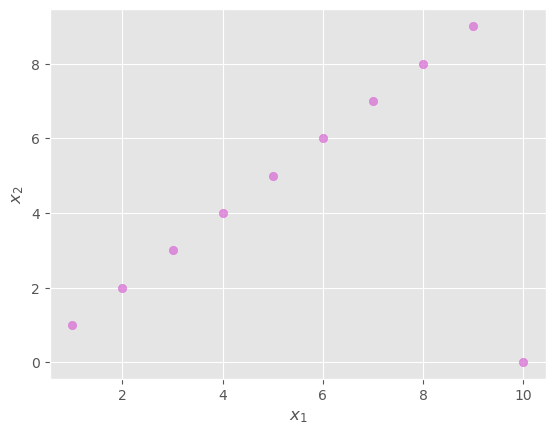

In [26]:
plt.scatter(data[:, 0], data[:, 1], color='orchid', alpha=0.75)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()

In [27]:
m = len(data)
n = 2

A = np.zeros((m, n))
A[:, 0] = data[:, 0]
A[:, 1] = 1

b = data[:, 1]

In [28]:
# Norma 1

c = np.hstack((np.zeros(n), np.ones(m)))
I = np.eye(m)
A_ub = np.vstack((np.hstack((A, -I)), np.hstack((-A, -I))))
b_ub = np.hstack((b, -b))

x_1 = linprog(c, A_ub, b_ub).x[:2]

print(f'x_1 = {x_1}')
print(f'norm(A @ x_1 - b, 1) = {np.linalg.norm(A @ x_1 - b, ord=1)}')

x_1 = [ 1. -0.]
norm(A @ x_1 - b, 1) = 10.0


In [29]:
# Norma 2

x_2, r_2 = sol_cuadmin(A, b, qrhouseholderp)

print(f'x_2 = {x_2}')
print(f'norm(A @ x_2 - b, 2) = {r_2}')

x_2 = [0.45454545 2.        ]
norm(A @ x_2 - b, 2) = 8.090398349558905


In [30]:
# Norma Inf

c = np.hstack((np.zeros(n), np.ones(1)))
e = np.ones(m).reshape(-1, 1)
A_ub = np.vstack((np.hstack((A, -e)), np.hstack((-A, -e))))
b_ub = np.hstack((b, -b))

x_inf = linprog(c, A_ub, b_ub).x[:2]

print(f'x_inf = {x_inf}')
print(f'norm(A @ x_inf - b, 1) = {np.linalg.norm(A @ x_inf - b, ord=np.inf)}')

x_inf = [0.  4.5]
norm(A @ x_inf - b, 1) = 4.5


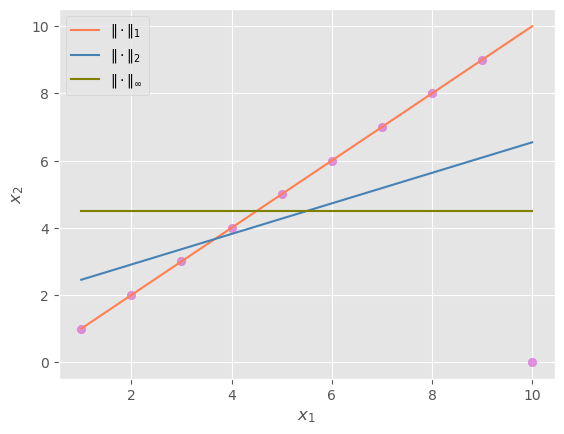

In [31]:
plt.scatter(data[:, 0], data[:, 1], color='orchid', alpha=0.75)
plt.plot(data[:, 0], A @ x_1, color='coral', label=r'$\|\cdot\|_1$')
plt.plot(data[:, 0], A @ x_2, color='steelblue', label=r'$\|\cdot\|_2$')
plt.plot(data[:, 0], A @ x_inf, color='olive', label=r'$\|\cdot\|_\infty$')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.show()

In [32]:
# Ejercicio 11

In [33]:
data = np.loadtxt('data/dryer2.dat')

In [34]:
t, u, y = data[:, 0], data[:, 1], data[:, 4]

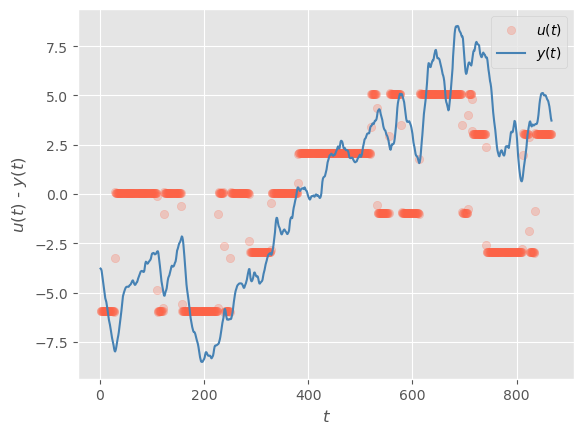

In [35]:
plt.scatter(t, u, color='tomato', label=r'$u(t)$', alpha=0.25)
plt.plot(t, y, color='steelblue', label=r'$y(t)$')
plt.xlabel(r'$t$')
plt.ylabel(r'$u(t)$ - $y(t)$')
plt.legend()
plt.show()

In [36]:
tau = 100
N = 500

U1 = np.zeros((N-tau+1, tau+1))
for i in range(N-tau+1):
    U1[i] = u[i: i+tau+1]

h, r2 = sol_cuadmin(U1, y[tau: N+1], qrhouseholderp)

U2 = np.zeros((len(t)-N, tau+1))
for i in range(len(t)-N):
    U2[i] = u[N-tau+i: N+i+1]

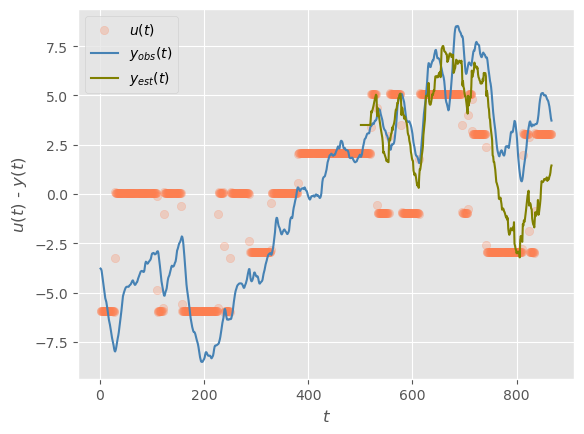

In [37]:
plt.scatter(t, u, color='coral', label=r'$u(t)$', alpha=0.25)
plt.plot(t, y, color='steelblue', label=r'$y_{obs}(t)$')
plt.plot(t[N:], U2 @ h, color='olive', label=r'$y_{est}(t)$')
plt.xlabel(r'$t$')
plt.ylabel(r'$u(t)$ - $y(t)$')
plt.legend()
plt.show()